# **Introduction:**
The climate variables network is designed for East Africa capital cities for each climate variable, and it is derived from Pearson Correllation Equation. using a moderate correlation threshold (0.5). Then, the motifs in each network were defined, motifs are recurring small-scale patterns or structures in a network that consist of specific arrangements of nodes and edges; they serve as
building blocks that abstract the complex structures within the network. In climate data analysis, motifs are crucial because they help identify significant relationships and interactions among climate variables and geographical locations. There are many motifs’ patterns first type
is a Triangle (3-node cliques) is a fully connected subgraph of three nodes where each node is directly connected to the other two. In climate networks triangles represent regions or variables that are strongly interdependent, such as cities experiencing highly correlated climate variable patterns. The second type is a star (Nodes with 3+ neighbors), it is a structure where one central
node is connected to three or more outer nodes, but the outer nodes are not connected. Stars might identify hubs or influential regions that affect other regions, for instance, the city with specific climate conditions may impact several surrounding cities. The third type is a chain where the Path of length is (3); it is a sequence of connected nodes where the length of the path
between the first and the last node is (3). The chain represents indirect relationships or dependencies in the network, for example, climate patterns in one region would affect another region indirectly through another intermediate region. It helps in analyzing the cascading effects and how changes propagate through the network. Also, it is essential to find the anticorrelation network for every climate variable to get more insights and view of climate connection, anticorrelation refers to a statistical relationship between two variables where they tend to move in opposite directions, and when one variable
increases, the other decreases, and vice versa. The anticorrelation is indicated by the negative correlation value, and when values close to -1 mean that it is a strong anticorrelation. This study uses a threshold of (-0.5) to identify a significant anticorrelation relationship between any two cities for each of our four climate variables.

# **Pearson Correlation Formula:**

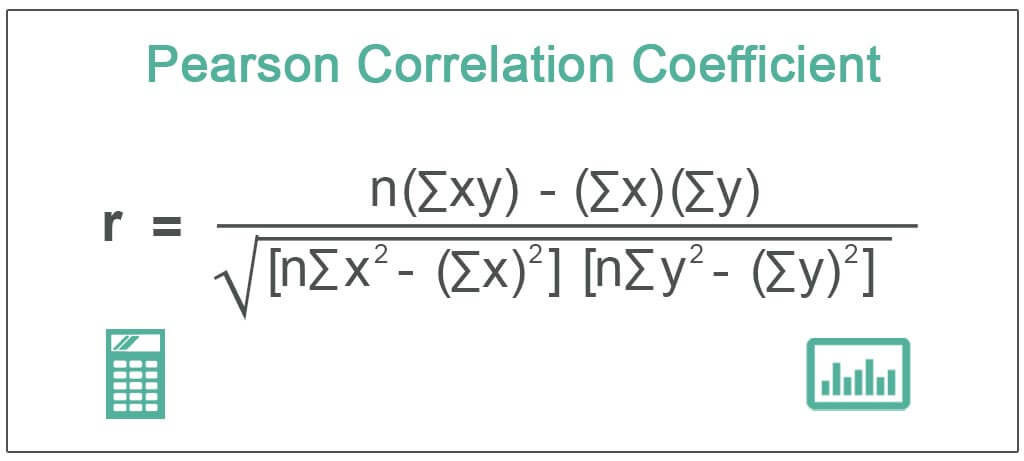

# **Where:**
r is pearson Correlation.

x and y are the two variables being compared.

n is the number of data points.

∑xy is the sum of the product of paired scores (x and y).

∑x2 and ∑y2 are the sums of squares for each variable.

# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.svm import SVR
from pprint import pprint
from matplotlib import pyplot
import time
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

# **Importing all Climate variables Data**

In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
H = pd.read_excel('Average Humidity.xlsx')
T = pd.read_excel('Average Temperature.xlsx')
W = pd.read_excel('Average Windspeed.xlsx')
R = pd.read_excel('Average Rainfall.xlsx')

Saving Average Humidity.xlsx to Average Humidity.xlsx
Saving Average Rainfall.xlsx to Average Rainfall.xlsx
Saving Average Temperature.xlsx to Average Temperature.xlsx
Saving Average Windspeed.xlsx to Average Windspeed.xlsx


# **1 - Temperature**

## **Temperature Complex Network Structure**

In [3]:
T.head(5)

,Date,Addis ababa,Daresalam,Bujumbura,Kigali,Kampala,Mogadishu,Nairobi,DIJIBUTI
0,2010-01,16.5464,25.1399,22.0679,22.0679,21.6621,26.0439,19.7688,26.0439
1,2010-02,19.0806,26.0774,22.1353,22.1353,20.9857,26.3750,21.0449,26.3750
2,2010-03,18.2340,25.8265,21.3598,21.3598,20.5162,28.0399,20.1545,28.0399
3,2010-04,19.3363,24.1411,21.4948,21.4948,21.0908,30.0347,20.2791,30.0347
4,2010-05,20.1288,22.9073,21.7274,21.7274,20.3822,32.7789,19.4226,32.7789


**Temperature Correlation Heatmap ( threshold Range from 1 to - 1 )**

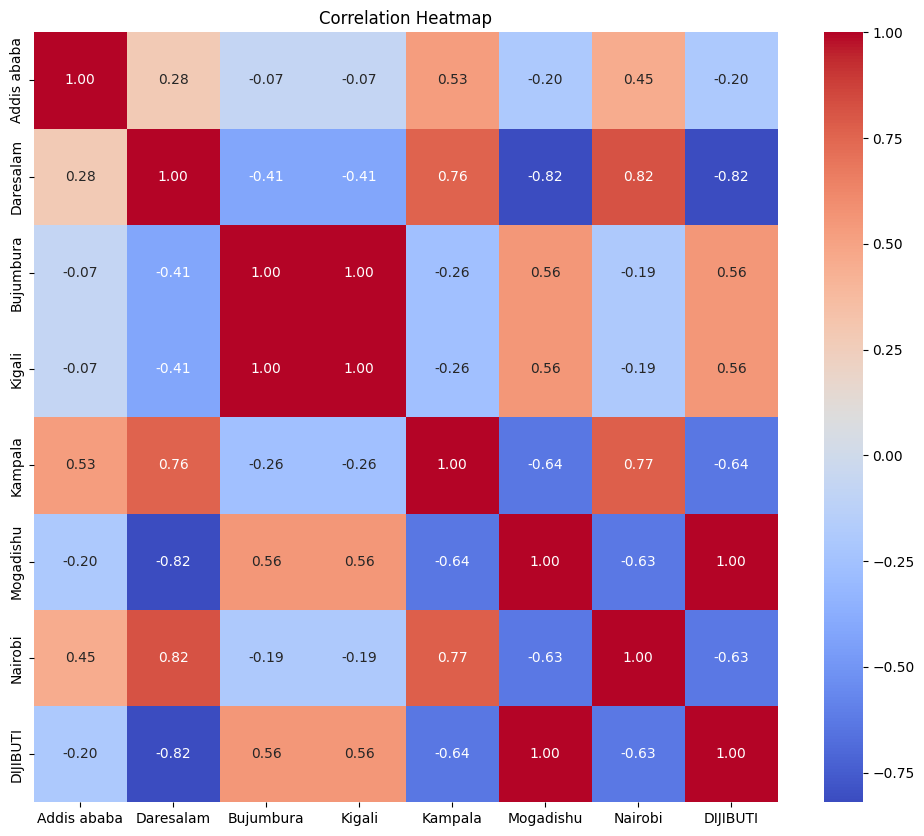

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate the Pearson correlation matrix
correlation_matrix = T.corr()

# Set the figure size
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


# Temperature Correlation Complex Network Structure Threshold 0.5

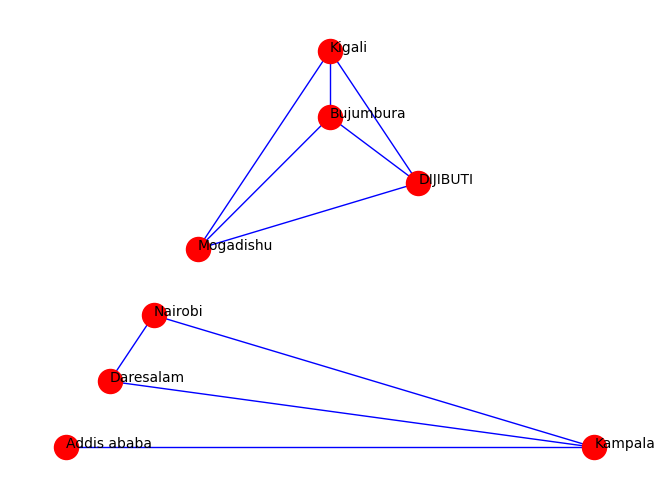

In [10]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# Drop the 'Date' column
#T = T.drop(columns=['Date'])
# Calculate the pairwise correlation matrix for the temperature values
correlation_matrix = T.corr(method='pearson')

# Create an empty graph
G = nx.Graph()

# Iterate through the correlation matrix and add edges for significant correlations
for i in range(len(T.columns)):
    for j in range(i + 1, len(T.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if correlation >= 0.5:
            G.add_edge(T.columns[i], T.columns[j])

# Add all nodes to the graph
for country in T.columns:
    G.add_node(country)

# Layout the graph using the spectral layout
pos = nx.planar_layout(G)


# Visualize the network
nx.draw(G, pos, node_color='red', edge_color='blue')

# Add labels to the nodes
for node, pos in pos.items():
    plt.text(pos[0], pos[1], node)

plt.show()


# Temperature Correlation Complex Network Structure Threshold 0.7

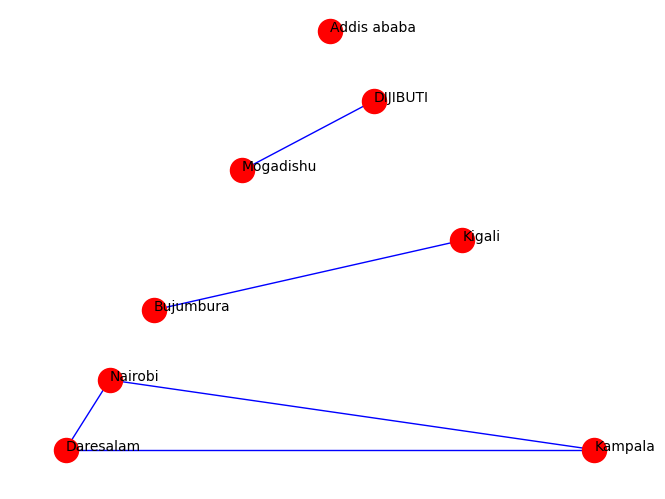

In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# Drop the 'Date' column
#T = T.drop(columns=['Date'])
# Calculate the pairwise correlation matrix for the temperature values
correlation_matrix = T.corr(method='pearson')

# Create an empty graph
G = nx.Graph()

# Iterate through the correlation matrix and add edges for significant correlations
for i in range(len(T.columns)):
    for j in range(i + 1, len(T.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if correlation >= 0.7:
            G.add_edge(T.columns[i], T.columns[j])

# Add all nodes to the graph
for country in T.columns:
    G.add_node(country)

# Layout the graph using the spectral layout
pos = nx.planar_layout(G)


# Visualize the network
nx.draw(G, pos, node_color='red', edge_color='blue')

# Add labels to the nodes
for node, pos in pos.items():
    plt.text(pos[0], pos[1], node)

plt.show()


# Temperature AntiCorrelation Complex Network Structure Threshold (-0.5)

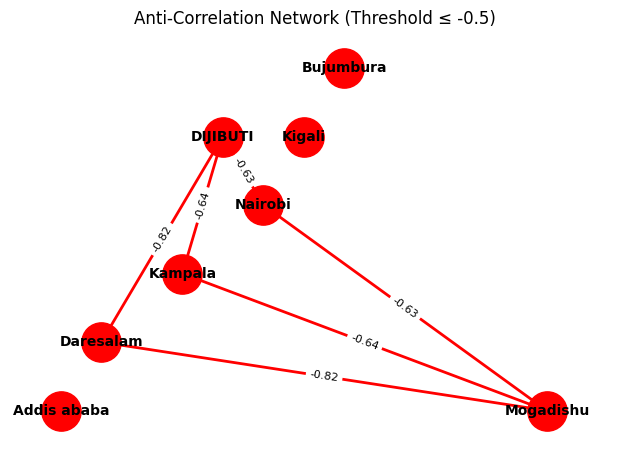

In [23]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = T.corr(method='pearson')

# Create an empty graph
G = nx.Graph()

# Add all nodes first (to include isolated nodes if any)
for country in T.columns:
    G.add_node(country)

# Iterate through the correlation matrix and add edges for anti-correlations
for i in range(len(T.columns)):
    for j in range(i + 1, len(T.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if correlation <= -0.5:  # Only keep anti-correlations
            G.add_edge(
                T.columns[i],
                T.columns[j],
                weight=correlation  # Store correlation as edge attribute
            )

# Layout the graph (planar_layout works well for sparse graphs)
pos = nx.planar_layout(G)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_color='red', node_size=800)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Draw edges with anti-correlation values as labels
edges = G.edges(data=True)
edge_colors = ['red' for _ in edges]  # Red for anti-correlations
nx.draw_networkx_edges(
    G, pos,
    edgelist=edges,
    edge_color=edge_colors,
    width=2.0
)

# Add edge labels (correlation values)
edge_labels = {
    (u, v): f"{d['weight']:.2f}"  # Format to 2 decimal places
    for u, v, d in edges
}
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='black',
    font_size=8
)

# Adjust plot margins and title
plt.title("Anti-Correlation Network (Threshold ≤ -0.5)", fontsize=12)
plt.margins(0.1)
plt.axis('off')  # Hide axes
plt.tight_layout()
plt.show()

# **Analysis of Temperature Network**

The temperature network designed for East Africa capital cities is derived from PearsonEquation using a moderate correlation threshold (0.5). Connections at this threshold level are shown with blue edges as appeared in second Figure. There are two distinct networks, the first network includes Djibouti, Mogadishu, Bujumbura, and Kigali, while the second network comprises Daresalam,
Nairobi, Addis Ababa, and Kampala. To measure the strength of the connections between cities more precisely the threshold was increased to (0.7). In the (0.7) threshold the network structure changed, and there are four separate networks noted, a prominent triangle involving Nairobi, Kampala, and Daresalam; a connection between Mogadishu and Djibouti; and a link between Kigali and
Bujumbura, while Addis Ababa was isolated.  From temperature network Mogadishu and Djibouti are aligned in their temperature pattern, and they have identical correlation links with the other cities. This alignment suggests that Mogadishu and Djibouti share similar climate conditions or drivers that influence their
temperature dynamics are synchronizing.
The temperature network shows that there are many significant patterns in the dataset, and
clarified how capital cities are interconnected through motifs like triangles, stars, and chains.
For temperature as appeared in Figure 1) there are 5 triangles motifs identified, in the pattern
of (['Kampala', 'Daresalam', 'Nairobi'] - ['Bujumbura', 'Kigali', 'Mogadishu'] - ['Bujumbura',
'Kigali', 'DIJIBUTI'] - ['Bujumbura', 'Mogadishu', 'DIJIBUTI'] - ['Kigali', 'Mogadishu',
'DIJIBUTI']). Each triangle pattern occurred once in the dataset. Also, there 5 stars motifs
identified, in this Patterns (Central node 'Kampala' connected to ['Addis ababa', 'Daresalam',
'Nairobi'] - Central node 'Bujumbura' connected to ['Kigali', 'Mogadishu', 'DIJIBUTI'] - Central
node 'Kigali' connected to ['Bujumbura', 'Mogadishu', 'DIJIBUTI'] - Central node 'Mogadishu'
connected to ['Bujumbura', 'Kigali', 'DIJIBUTI'] - Central node 'DIJIBUTI' connected to
['Bujumbura', 'Kigali', 'Mogadishu']. The chains are 28 identified in temperature network, some
examples include (['Addis ababa', 'Kampala', 'Nairobi', 'Daresalam'] - ['Daresalam', 'Nairobi',
'Kampala', 'Addis ababa'] - ……. - ['Bujumbura', 'Mogadishu', 'DIJIBUTI', 'Kigali']).
In the anticorrelation temperature network in Figure 2), Mogadishu and Djibouti have a notable
inverse relationship with several other cities, Nairobi (-0.63), Daresalam (-0.82), and Kampala
(-0.64). This indicates that as the temperature in Mogadishu and Djibouti increases, the
temperature in the other cities decreases, and vice versa. In the temperature anticorrelation
network Mogadishu and Djibouti are also aligned in their temperature pattern as in the
temperature correlation network, which would lead to identical anticorrelation links with the
other cities.

# **2 - Rainfall**

# **Rainfall Complex Network Structure**

In [15]:
R.head(5)

,Date,Addis ababa,Daresalam,Mogadishu,Nairobi,Kampala,Kigali,Bujumbura,Dijibouti
0,2010-01,0.000000,1.883100,0.000000,5.02238,0.38504,5.93531,0.00000,0.000000
1,2010-02,0.784364,0.353786,0.552450,22.81750,4.70126,10.41450,3.04800,0.552450
2,2010-03,1.555310,3.873500,0.206375,5.34026,4.59688,4.28442,2.49115,0.206375
3,2010-04,5.998100,2.262910,0.000000,2.63722,8.04424,9.46479,0.83820,0.000000
4,2010-05,1.464460,4.995330,0.000000,3.60590,3.33857,0.00000,0.00000,0.000000


# Rainfall Correlation Heatmap ( threshold Range from 1 to - 1 )

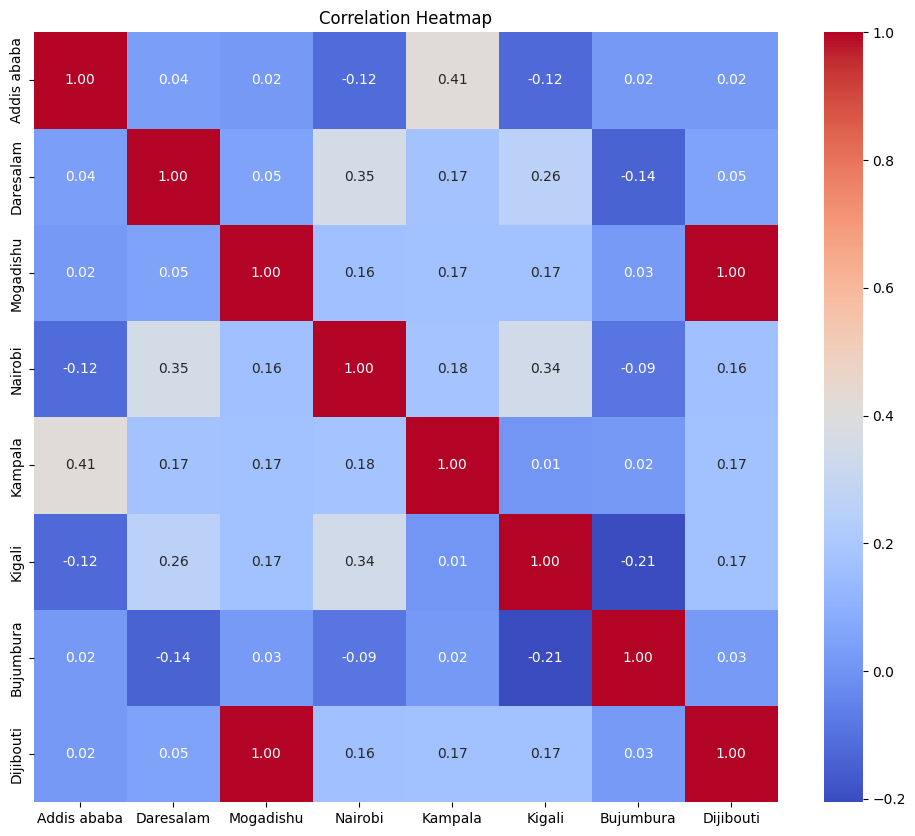

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate the Pearson correlation matrix
correlation_matrix = R.corr()

# Set the figure size
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


# Rainfall Correlation Complex Network Structure Threshold 0.5

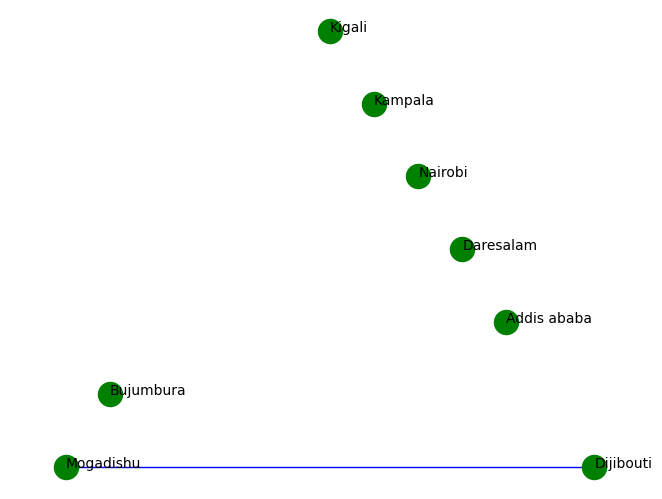

In [18]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# Drop the 'Date' column
#R = R.drop(columns=['Date'])
# Calculate the pairwise correlation matrix for the temperature values
correlation_matrix = R.corr(method='pearson')

# Create an empty graph
G = nx.Graph()

# Iterate through the correlation matrix and add edges for significant correlations
for i in range(len(R.columns)):
    for j in range(i + 1, len(R.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if correlation >= 0.5:
            G.add_edge(R.columns[i], R.columns[j])

# Add all nodes to the graph
for country in R.columns:
    G.add_node(country)

# Layout the graph using the spectral layout
pos = nx.planar_layout(G)


# Visualize the network
nx.draw(G, pos, node_color='Green', edge_color='blue')

# Add labels to the nodes
for node, pos in pos.items():
    plt.text(pos[0], pos[1], node)

plt.show()


# Rainfall Correlation Complex Network Structure Threshold 0.7

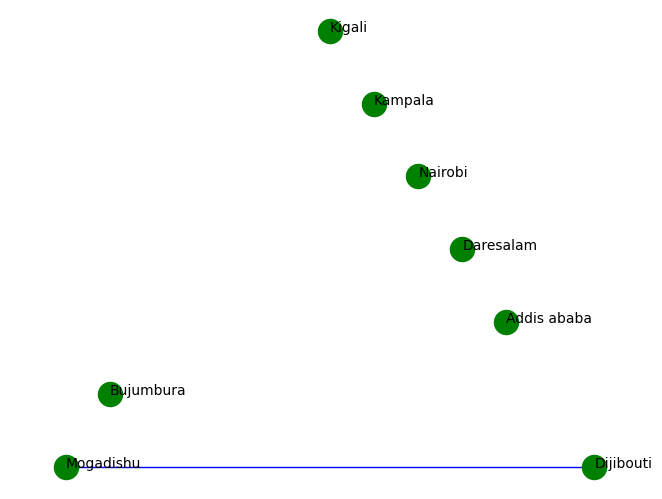

In [20]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# Drop the 'Date' column
#R = R.drop(columns=['Date'])
# Calculate the pairwise correlation matrix for the temperature values
correlation_matrix = R.corr(method='pearson')

# Create an empty graph
G = nx.Graph()

# Iterate through the correlation matrix and add edges for significant correlations
for i in range(len(R.columns)):
    for j in range(i + 1, len(R.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if correlation >= 0.7:
            G.add_edge(R.columns[i], R.columns[j])

# Add all nodes to the graph
for country in R.columns:
    G.add_node(country)

# Layout the graph using the spectral layout
pos = nx.planar_layout(G)


# Visualize the network
nx.draw(G, pos, node_color='Green', edge_color='blue')

# Add labels to the nodes
for node, pos in pos.items():
    plt.text(pos[0], pos[1], node)

plt.show()


# Rainfall AntiCorrelation Complex Network Structure Threshold (-0.5)

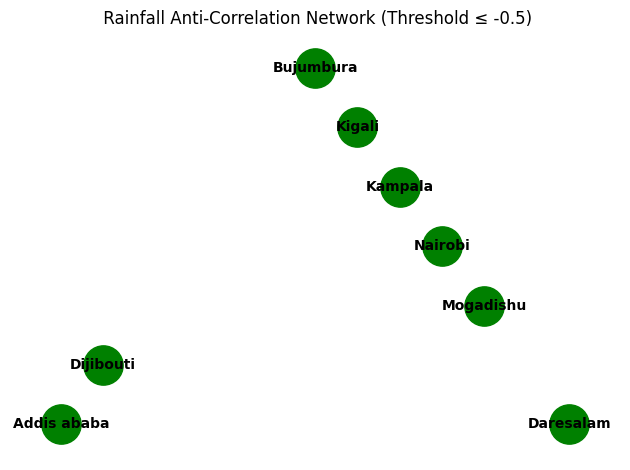

In [21]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = R.corr(method='pearson')

# Create an empty graph
G = nx.Graph()

# Add all nodes first (to include isolated nodes if any)
for country in R.columns:
    G.add_node(country)

# Iterate through the correlation matrix and add edges for anti-correlations
for i in range(len(R.columns)):
    for j in range(i + 1, len(R.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if correlation <= -0.5:  # Only keep anti-correlations
            G.add_edge(
                R.columns[i],
                R.columns[j],
                weight=correlation  # Store correlation as edge attribute
            )

# Layout the graph (planar_layout works well for sparse graphs)
pos = nx.planar_layout(G)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_color='Green', node_size=800)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Draw edges with anti-correlation values as labels
edges = G.edges(data=True)
edge_colors = ['red' for _ in edges]  # Red for anti-correlations
nx.draw_networkx_edges(
    G, pos,
    edgelist=edges,
    edge_color=edge_colors,
    width=2.0
)

# Add edge labels (correlation values)
edge_labels = {
    (u, v): f"{d['weight']:.2f}"  # Format to 2 decimal places
    for u, v, d in edges
}
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='black',
    font_size=8
)

# Adjust plot margins and title
plt.title(" Rainfall Anti-Correlation Network (Threshold ≤ -0.5)", fontsize=12)
plt.margins(0.1)
plt.axis('off')  # Hide axes
plt.tight_layout()
plt.show()

# **Analysis of Rainfall Network**

The rainfall correlation network has the weakest connections among all other climate variables. According to second Figure in Rainfall part under (0.5) correlation threshold there are seven sub-networks, six networks comprised of single nodes while the seventh included two connected nodes. When the threshold is increased to (0.7) the network structure does not change. The sparse network
highlights the weak relationships in rainfall across the region and suggests that rainfall behavior is distinct from one city to another except for Djibouti and Mogadishu which indicates similar rainfall patterns.  The rainfall network analysis showed as in second Figure  no significant motifs. Specifically, no
triangles, stars, or chains were detected. This indicates an absence of recurring small-scale connectivity patterns within the rainfall network. In the rainfall anticorrelation network no significant inverse relationships were observed between any pairs of cities. As no correlation value is less than a threshold of (-0.5). This indicates that the rainfall patterns across the studied cities are not strongly inversely related, as displayed in fourth Figure in rainfall part.


# **3 - Humidity**

# Humidity Complex Network Structure

In [3]:
H.head(5)

,Date,Nairobi,Dijibouti,Addis ababa,Daresalam,Kampala,Kigali,Bujumbura,Mogadishu
0,2010-01,75,74,55,66,65,65,77,78
1,2010-02,73,73,50,65,66,64,76,77
2,2010-03,72,74,54,71,72,74,78,77
3,2010-04,78,75,59,78,80,80,80,79
4,2010-05,77,67,57,81,81,74,76,79


# Humidity Correlation Heatmap ( threshold Range from 1 to - 1 )

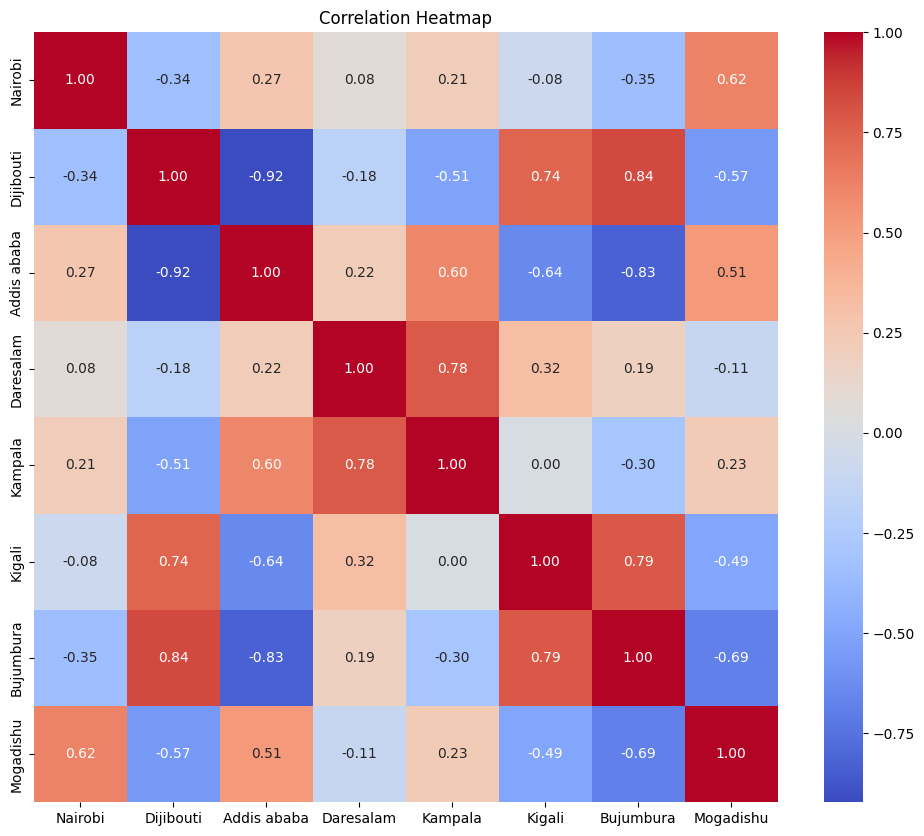

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate the Pearson correlation matrix
correlation_matrix = H.corr()

# Set the figure size
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


#Humidity Correlation Complex Network Structure Threshold 0.5

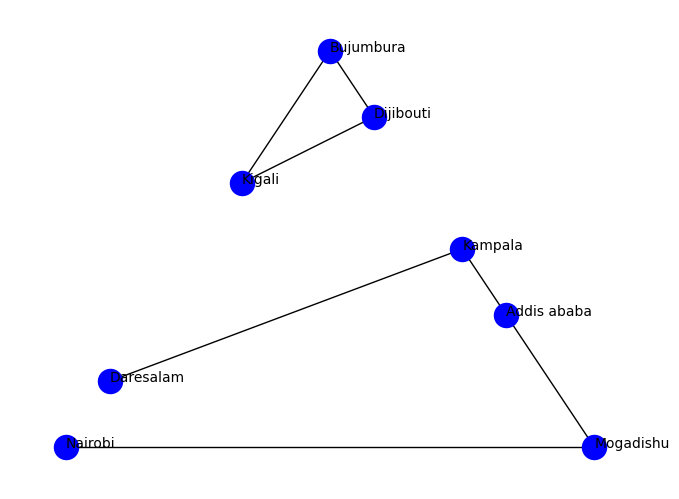

In [11]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# Drop the 'Date' column
#H = H.drop(columns=['Date'])
# Calculate the pairwise correlation matrix for the temperature values
correlation_matrix = H.corr(method='pearson')

# Create an empty graph
G = nx.Graph()

# Iterate through the correlation matrix and add edges for significant correlations
for i in range(len(H.columns)):
    for j in range(i + 1, len(H.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if correlation >= 0.5:
            G.add_edge(H.columns[i], H.columns[j])

# Add all nodes to the graph
for country in H.columns:
    G.add_node(country)

# Layout the graph using the spectral layout
pos = nx.planar_layout(G)


# Visualize the network
nx.draw(G, pos, node_color='blue', edge_color='black')

# Add labels to the nodes
for node, pos in pos.items():
    plt.text(pos[0], pos[1], node)

plt.show()

# Humidity Correlation Complex Network Structure Threshold 0.7

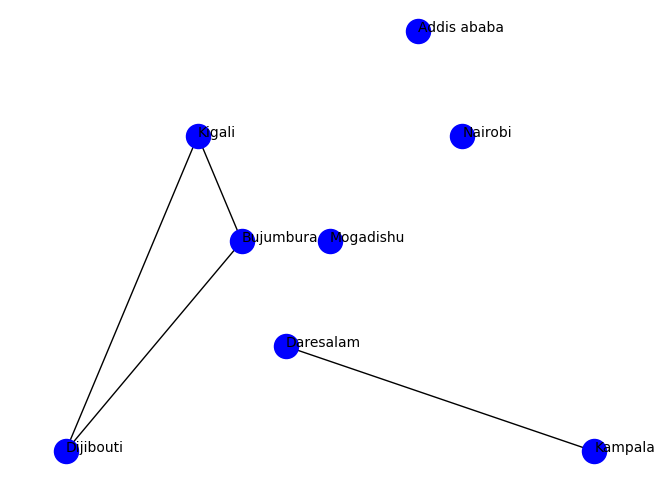

In [10]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# Drop the 'Date' column
#H = H.drop(columns=['Date'])
# Calculate the pairwise correlation matrix for the temperature values
correlation_matrix = H.corr(method='pearson')

# Create an empty graph
G = nx.Graph()

# Iterate through the correlation matrix and add edges for significant correlations
for i in range(len(H.columns)):
    for j in range(i + 1, len(H.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if correlation >= 0.7:
            G.add_edge(H.columns[i], H.columns[j])

# Add all nodes to the graph
for country in H.columns:
    G.add_node(country)

# Layout the graph using the spectral layout
pos = nx.planar_layout(G)


# Visualize the network
nx.draw(G, pos, node_color='blue', edge_color='black')

# Add labels to the nodes
for node, pos in pos.items():
    plt.text(pos[0], pos[1], node)

plt.show()

# Humidity AntiCorrelation Complex Network Structure Threshold (-0.5)

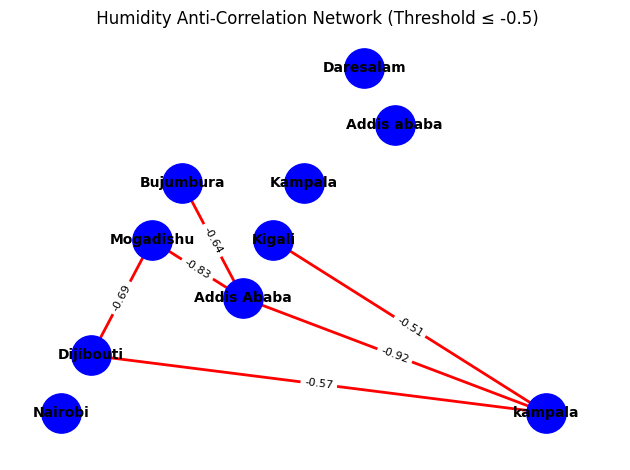

In [24]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = H.corr(method='pearson')

# Create an empty graph
G = nx.Graph()

# Add all nodes first (to include isolated nodes if any)
for country in H.columns:
    G.add_node(country)

# Iterate through the correlation matrix and add edges for anti-correlations
for i in range(len(H.columns)):
    for j in range(i + 1, len(H.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if correlation <= -0.5:  # Only keep anti-correlations
            G.add_edge(
                W.columns[i],
                W.columns[j],
                weight=correlation  # Store correlation as edge attribute
            )

# Layout the graph (planar_layout works well for sparse graphs)
pos = nx.planar_layout(G)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_color='blue', node_size=800)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Draw edges with anti-correlation values as labels
edges = G.edges(data=True)
edge_colors = ['red' for _ in edges]  # Red for anti-correlations
nx.draw_networkx_edges(
    G, pos,
    edgelist=edges,
    edge_color=edge_colors,
    width=2.0
)

# Add edge labels (correlation values)
edge_labels = {
    (u, v): f"{d['weight']:.2f}"  # Format to 2 decimal places
    for u, v, d in edges
}
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='black',
    font_size=8
)

# Adjust plot margins and title
plt.title(" Humidity Anti-Correlation Network (Threshold ≤ -0.5)", fontsize=12)
plt.margins(0.1)
plt.axis('off')  # Hide axes
plt.tight_layout()
plt.show()

# **Analysis of Humidity Network**

The humidity network in correlation threshold (0.5) as appeared in second Figure in humidity part has two sub networks, the first triangular network involving Bujumbura, Kigali, and Djibouti, and the second network with other five nodes. Then when the threshold increased to (0.7) the network
became more fragmented and contained four sub-networks; three with single nodes, one with two nodes, and the triangular network with three nodes remaining stable. Also, the network analysis in Third Figure recognized one significant triangle motif include three cities [Dijibuti, Kigali, and Bujumbura], and no star motifs were detected. Additionally, four chains of length 3 were identified, representing indirect relationships involving nodes like [Nairobi, Mogadishu, Addis Ababa, Kampala, and Daresalam] reflecting the propagation of humidity effects across these cities.
The humidity anticorrelation network in fourth Figure in humdity part identified several inverse relationships, Djibouti registered strong negative relationship with Addis Ababa (-0.92), Mogadishu (-0.57), and Kampala (-0.51). Additionally, Addis Ababa had notable inverse connection with Kigali (0.64) and Bujumbura (-0.83), while Mogadishu has negative relationship with Bujumbura (0.69).


# **4 - Windspeed**

# **Windspeed Complex Network Structure**

In [18]:
H.head(5)

,Nairobi,Dijibouti,Addis ababa,Daresalam,Kampala,Kigali,Bujumbura,Mogadishu
0,75,74,55,66,65,65,77,78
1,73,73,50,65,66,64,76,77
2,72,74,54,71,72,74,78,77
3,78,75,59,78,80,80,80,79
4,77,67,57,81,81,74,76,79


# Windspeed Correlation Heatmap ( threshold Range from 1 to - 1 )

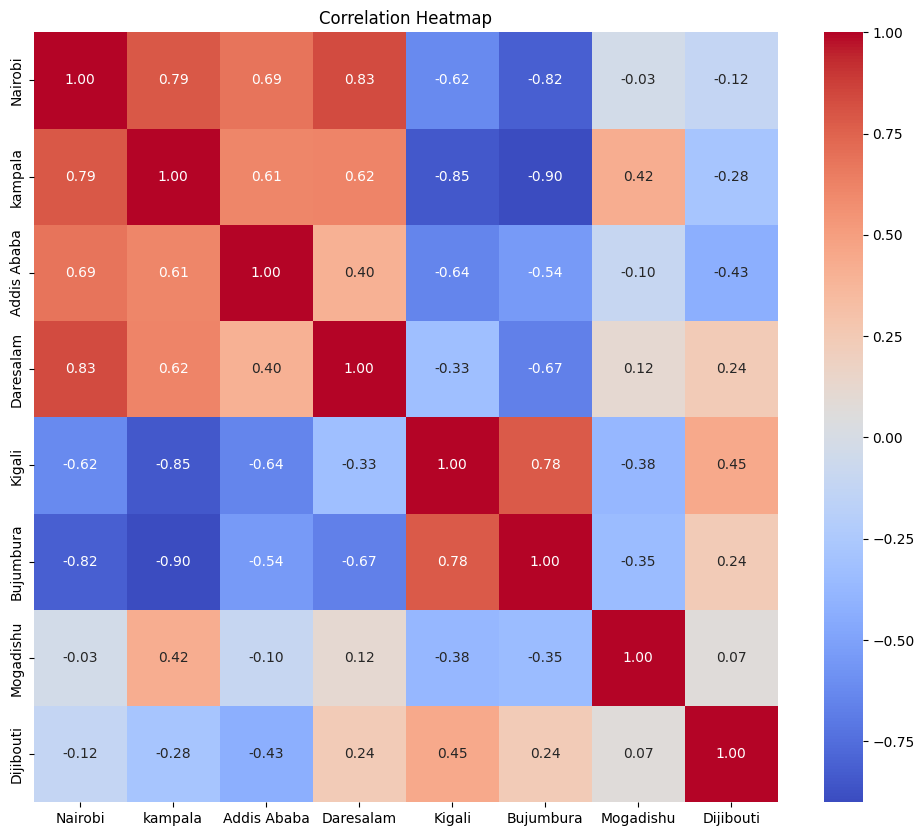

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate the Pearson correlation matrix
correlation_matrix = W.corr()

# Set the figure size
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


#Windspeed Correlation Complex Network Structure Threshold 0.5

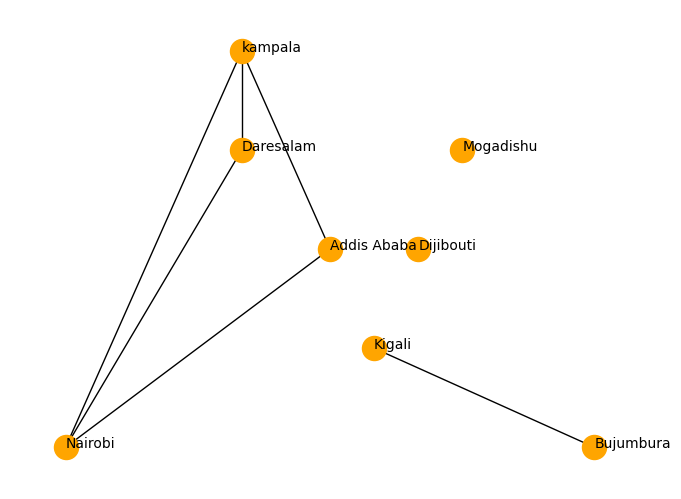

In [19]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# Drop the 'Date' column
W = W.drop(columns=['Date'])
# Calculate the pairwise correlation matrix for the temperature values
correlation_matrix = W.corr(method='pearson')

# Create an empty graph
G = nx.Graph()

# Iterate through the correlation matrix and add edges for significant correlations
for i in range(len(W.columns)):
    for j in range(i + 1, len(W.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if correlation >= 0.5:
            G.add_edge(W.columns[i], W.columns[j])

# Add all nodes to the graph
for country in W.columns:
    G.add_node(country)

# Layout the graph using the spectral layout
pos = nx.planar_layout(G)


# Visualize the network
nx.draw(G, pos, node_color='orange', edge_color='black')

# Add labels to the nodes
for node, pos in pos.items():
    plt.text(pos[0], pos[1], node)

plt.show()

# Windspeed Correlation Complex Network Structure Threshold 0.7

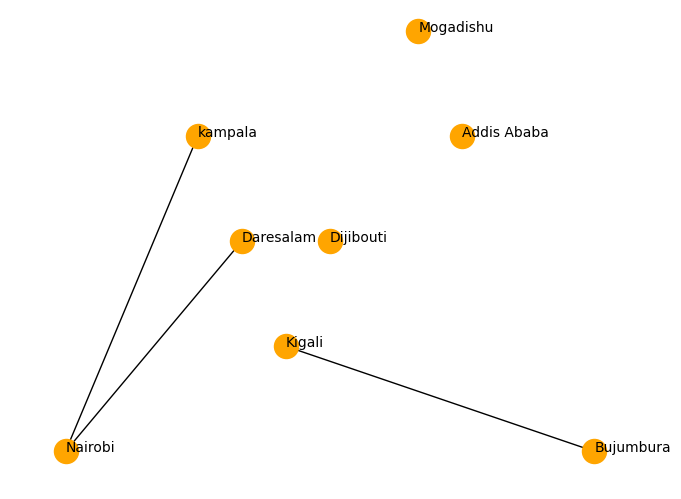

In [21]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# Drop the 'Date' column
#W = W.drop(columns=['Date'])
# Calculate the pairwise correlation matrix for the temperature values
correlation_matrix = W.corr(method='pearson')

# Create an empty graph
G = nx.Graph()

# Iterate through the correlation matrix and add edges for significant correlations
for i in range(len(W.columns)):
    for j in range(i + 1, len(W.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if correlation >= 0.7:
            G.add_edge(W.columns[i], W.columns[j])

# Add all nodes to the graph
for country in W.columns:
    G.add_node(country)

# Layout the graph using the spectral layout
pos = nx.planar_layout(G)


# Visualize the network
nx.draw(G, pos, node_color='orange', edge_color='black')

# Add labels to the nodes
for node, pos in pos.items():
    plt.text(pos[0], pos[1], node)

plt.show()

# Windspeed AntiCorrelation Complex Network Structure Threshold (-0.5)

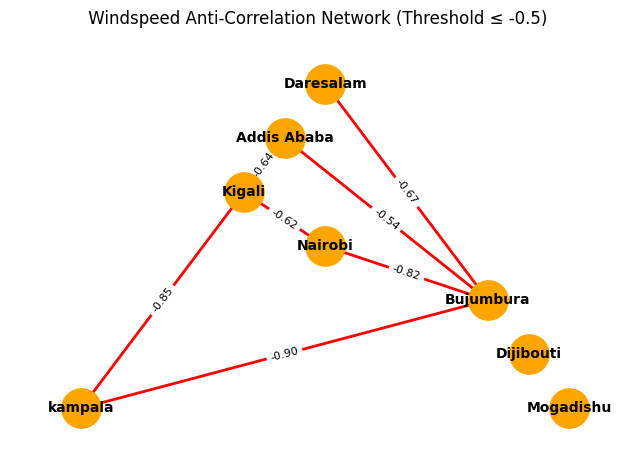

In [22]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = W.corr(method='pearson')

# Create an empty graph
G = nx.Graph()

# Add all nodes first (to include isolated nodes if any)
for country in W.columns:
    G.add_node(country)

# Iterate through the correlation matrix and add edges for anti-correlations
for i in range(len(W.columns)):
    for j in range(i + 1, len(W.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if correlation <= -0.5:  # Only keep anti-correlations
            G.add_edge(
                W.columns[i],
                W.columns[j],
                weight=correlation  # Store correlation as edge attribute
            )

# Layout the graph (planar_layout works well for sparse graphs)
pos = nx.planar_layout(G)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_color='orange', node_size=800)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Draw edges with anti-correlation values as labels
edges = G.edges(data=True)
edge_colors = ['red' for _ in edges]  # Red for anti-correlations
nx.draw_networkx_edges(
    G, pos,
    edgelist=edges,
    edge_color=edge_colors,
    width=2.0
)

# Add edge labels (correlation values)
edge_labels = {
    (u, v): f"{d['weight']:.2f}"  # Format to 2 decimal places
    for u, v, d in edges
}
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='black',
    font_size=8
)

# Adjust plot margins and title
plt.title(" Windspeed Anti-Correlation Network (Threshold ≤ -0.5)", fontsize=12)
plt.margins(0.1)
plt.axis('off')  # Hide axes
plt.tight_layout()
plt.show()

**Analysis of Windspeed Network**

The wind speed network at a correlation threshold (0.5) has four sub-networks, two consisting of single nodes, one with two connected nodes, and the giant component network composed of four nodes linked by five edges as clarified in Second Figure in windspeed part. At the (0.7) threshold the network is
more scattered, the regime comprises five separate sub-networks, and the most robust connections are found between Daresalam and Nairobi, Nairobi and Kampala, Kigali and Bujumbura. Also, from the wind speed network analysis in fourth Figure in Windspeed section appeared two triangles, indicating strong interdependence among the nodes of [Nairobi, Kampala, Addis Ababa, and Daresalam] each triangle appeared once. Additionally, two stars were detected, centered around [Nairobi and Kampala] each connecting to three nodes [Addis Ababa, Daresalam, and each other]. The analysis also identified 12 chains, highlighting multiple indirect connections and propagation patterns among the nodes, these motifs indicate significant local and regional interactions in wind speed dynamics. The wind speed anticorrelation network in fourth Figure in windspeed section showed several inverse relationships. Kigali demonstrated strong negative correlations with Nairobi (-0.62), Addis Ababa (-0.64), and Kampala (-0.85). Similarly, Bujumbura exhibited significant anticorrelations with Addis Ababa (-0.54), Daresalam (-0.67), Nairobi (-0.82), and Kampala (-0.90).
